In [1]:
from pysb import Model, Monomer, Parameter, Expression,  Rule, Observable, Compartment
from pysb import Initial, Annotation, ANY, Annotation
from pysb.simulator import ScipyOdeSimulator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Model();

In [3]:
# M is the parent 2d compartment (membrane), while C is the 3d child compartment (cytosol)
# M is 100 times smaller than C
Parameter('M_vol', .01) 
Compartment('M', parent=None, dimension=2, size=M_vol)
Parameter('C_vol', 1)
Compartment('C', parent=M, dimension=3, size=C_vol)

Compartment(name='C', parent=M, dimension=3, size=C_vol)

In [4]:
# Two generic monomers. 
# As implemented below, A will be membrane bound only (M compartment). 
# B can be either in the cytosol (C) or membrane (M)
Monomer('A',['x'])
Monomer('B',['x'])

Monomer('B', ['x'])

In [5]:
# Initial parameters
Parameter('A_0', 1)
Initial(A(x=None)**M, A_0)

# we can initialize B either in the M or C compartment
Parameter('cB_0', 1)
Initial(B(x=None)**C, cB_0)
Parameter('mB_0', 1)
Initial(B(x=None)**M, mB_0)

Initial(B(x=None) ** M, mB_0)

In [6]:
# Binding between A and B can only occur in the M compartment
Parameter('kAB', 1)
Rule('AB', A(x=None)**M+B(x=None)**M >> A(x=1)**M % B(x=1)**M, kAB)
# B can be translocated from the C to M compartment, where it can then bind A
Parameter('kf_B_C_to_M', 1)
Rule('B_C_to_M', B(x=None)**C >> B(x=None)**M, kf_B_C_to_M)

Rule('B_C_to_M', B(x=None) ** C >> B(x=None) ** M, kf_B_C_to_M)

In [7]:
Observable('AB_y', A(x=1) % B(x=1))
Observable('A_y', A())
Observable('mB_y', B()**M)
Observable('cB_y', B()**C);

In [8]:
sim = ScipyOdeSimulator(model)

## 

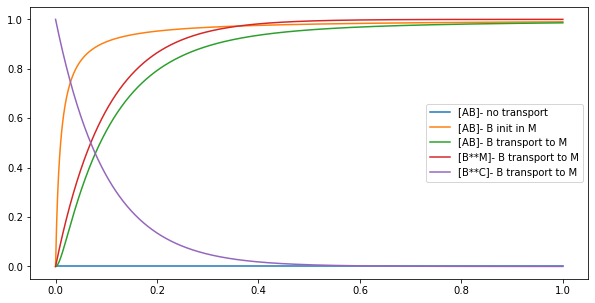

In [9]:
# Negative control, no cytosol to membrane translocation
# AB should never form
plt.figure(figsize=(10,5))
tspan = np.linspace(0,1, 1000)
res = sim.run(tspan, param_values={
    'kAB': 1,
    # no translocation
    'kf_B_C_to_M': 0,
    'mB_0': 0,
    'cB_0': 1,
})
y1 = res.all

# Positive control, B initialized entirely in membrane
# AB quickly forms
res = sim.run(tspan, param_values={
    'kAB': 1,
    'mB_0': 1,
    'cB_0': 0,
})
y2 = res.all

# B in cytosol, transported to membrane
# AB quickly forms
res = sim.run(tspan, param_values={
    'kAB': 1,
    'mB_0': 0,
    'cB_0': 1,
    # include translocation
    'kf_B_C_to_M': 10,
})
y3 = res.all

plt.plot(tspan, y1['AB_y'], label='[AB]- no transport')
plt.plot(tspan, y2['AB_y'], label='[AB]- B init in M')
plt.plot(tspan, y3['AB_y'], label='[AB]- B transport to M')
plt.plot(tspan, y3['mB_y'], label='[B**M]- B transport to M')
plt.plot(tspan, y3['cB_y'], label='[B**C]- B transport to M')

plt.legend();

In [10]:
# print('Initial A', y1['A_y'][0])
# print('Initial mB', y1['mB_y'][0])
# print('Initial cB', y1['cB_y'][0])
# print('-')
# print('Initial A', y2['A_y'][0])
# print('Initial mB', y2['mB_y'][0])
# print('Initial cB', y2['cB_y'][0])
# print('-')
# print('Initial A', y3['A_y'][0])
# print('Initial mB', y3['mB_y'][0])
# print('Initial cB', y3['cB_y'][0])